# 0. 데이터 불러오고 확인

In [89]:
import numpy as np # linear algebra
import pandas as pd # data frame, data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # matplotlib 도 종류가 다양하기 때문에 seaborn 스타일로 지정한 거임.
sns.set(font_scale=1.5) # (기본으로) 폰트 크기 2.5로 지정 미리 해놓는거 2.5면 꽤 크게 나옴

import missingno as msno # missing data 잘 보여주는 라이브러리
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
df_train = pd.read_csv('./Adv_IMC_train.csv', encoding='utf8')
df_test = pd.read_csv('./Adv_IMC_test.csv', encoding='utf8')
print(df_train.shape)
print(df_test.shape)

(1042, 12)
(261, 11)


In [3]:
df_train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.9
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.0
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0


In [4]:
df_test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Toshiba,Portege X30-D-10J,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg
1,HP,Spectre 13-V100nv,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11kg
2,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,2.4kg
3,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg
4,HP,EliteBook 820,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg


# 1. EDA 시작

## 1.0 결측치 확인 및 제거

<AxesSubplot:>

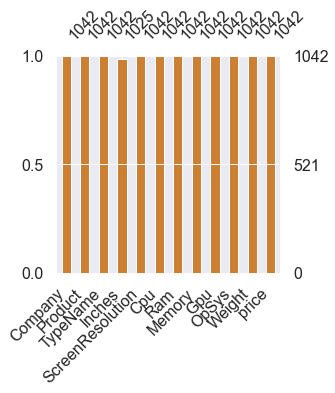

In [5]:
msno.bar(df=df_train.iloc[:,:], figsize=(4,4), color=(0.8,0.5,0.2)) 

In [6]:
print('train에 대한 결측치 비율 확인')
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0])) #오른쪽정렬
    print(msg) 

train에 대한 결측치 비율 확인
column:    Company	 Percent of NaN value: 0.00%
column:    Product	 Percent of NaN value: 0.00%
column:   TypeName	 Percent of NaN value: 0.00%
column:     Inches	 Percent of NaN value: 1.63%
column: ScreenResolution	 Percent of NaN value: 0.00%
column:        Cpu	 Percent of NaN value: 0.00%
column:        Ram	 Percent of NaN value: 0.00%
column:     Memory	 Percent of NaN value: 0.00%
column:        Gpu	 Percent of NaN value: 0.00%
column:      OpSys	 Percent of NaN value: 0.00%
column:     Weight	 Percent of NaN value: 0.00%
column:      price	 Percent of NaN value: 0.00%


In [7]:
print('test에 대한 결측치 비율 확인')
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0])) #오른쪽정렬
    print(msg) 

test에 대한 결측치 비율 확인
column:    Company	 Percent of NaN value: 0.00%
column:    Product	 Percent of NaN value: 0.00%
column:   TypeName	 Percent of NaN value: 0.00%
column:     Inches	 Percent of NaN value: 0.00%
column: ScreenResolution	 Percent of NaN value: 0.00%
column:        Cpu	 Percent of NaN value: 0.00%
column:        Ram	 Percent of NaN value: 0.00%
column:     Memory	 Percent of NaN value: 0.00%
column:        Gpu	 Percent of NaN value: 0.00%
column:      OpSys	 Percent of NaN value: 0.00%
column:     Weight	 Percent of NaN value: 0.00%


In [8]:
df_train.dropna(axis=0,inplace=True)
df_train.index = range(df_train.shape[0])

# test는 제거할 결측치가 없음
# df_train.dropna(axis=0,inplace=True)
# df_train.index = range(df_train.shape[0])

## 1.1 Ram 과 Weight 변수 수치화로

- 수치형 자료로 바꿔주어야할 변수들 :

Ram은 GB 없애기,
Weight는 kg 없애기,


In [9]:
# Ram은 GB 없애기
df_train['Ram'] = df_train['Ram'].apply(lambda x: x.replace('GB','')).astype('float')
df_test['Ram'] = df_test['Ram'].apply(lambda x: x.replace('GB','')).astype('float')

In [10]:
# Weight는 kg 없애기
df_train['Weight'] = df_train['Weight'].apply(lambda x: x.replace('kg','')).astype('float')
df_test['Weight'] = df_test['Weight'].apply(lambda x: x.replace('kg','')).astype('float')

## 1.2 Memory 변수

### 1.2.1 Memory의 'SSD','HDD','Hybrid','Flash Storage' 범주를 이용하여 각각에 대한 GB 단위 용량 변수 생성

In [11]:
# 길이가 3보다 큰 친구들은 +로 연결되어있는 친구들
df_train.Memory.value_counts()

256GB SSD                    312
1TB HDD                      173
500GB HDD                    109
512GB SSD                     93
128GB SSD +  1TB HDD          77
128GB SSD                     63
256GB SSD +  1TB HDD          61
32GB Flash Storage            28
64GB Flash Storage            14
512GB SSD +  1TB HDD          12
1TB SSD                       11
2TB HDD                        8
256GB SSD +  2TB HDD           8
1.0TB Hybrid                   8
256GB Flash Storage            7
16GB Flash Storage             6
128GB Flash Storage            4
32GB SSD                       4
180GB SSD                      4
512GB Flash Storage            2
256GB SSD +  500GB HDD         2
512GB SSD +  2TB HDD           2
1TB SSD +  1TB HDD             2
128GB SSD +  2TB HDD           2
16GB SSD                       2
256GB SSD +  1.0TB Hybrid      1
508GB Hybrid                   1
8GB SSD                        1
1.0TB HDD                      1
64GB SSD                       1
512GB SSD 

- 길이가 3보다 큰 친구들은 +로 연결되어있는 친구들

- 길이가 3인 친구들은 Flash Storage인 친구들

- 길이가 2 이하인 친구들은 SSD이거나 HDD이거나 Hybrid

- length 4, 3, 2 로 저장해놓은 인덱스를 이용하여 각각의 인덱싱한 데이터프레임에 대하여 따로 함수 적용
- GB혹은 TB로 용량이 표시되어있고 뒤에 메모리의 종류가 적혀있는 구조이다.
- length 4면 +로 split한 다음 첫번째원소는 두번째원소를 변수명으로 하는 value, 세번째 원소는 네번째 원소를 변수명으로 하는 value
- length 3이면 split한 다음 첫 번째 원소만 가져오고 변수명은 Flash Storage로
- length 2면 split한 다음 첫 번째 원소를 value로 가져오고 두번째를 변수명으로(SSD, HDD, Hybrid 중에 하나)

In [12]:
# length4에 대하여
def Preprocess_MemoryColumn(df):
    # +로 연결되어있는 친구들, SSD HDD Hybrid 등 여러 가지를 가지고 있다.
    length4 = np.where(df.Memory.apply(lambda x: '+' in x))[0]
    
    GB_front = df.loc[length4,'Memory'].str.split('+').str[0].str.rstrip()
    front_name = GB_front.str.split().str[1]
    front_value = GB_front.str.split().str[0]

    for i in length4:
        c = front_name[i]
        v = front_value[i]
        if c == 'Flash':
            c = 'Flash Storage'
        if 'TB' in v:
            df.loc[i,c] = float(v.replace('TB',''))*1000
        else:
            df.loc[i,c] = float(v.replace('GB',''))

    GB_back = df.loc[length4,'Memory'].str.split('+').str[1].str.lstrip()
    back_name = GB_back.str.split().str[1]
    back_value = GB_back.str.split().str[0]

    for i in length4:
        c = back_name[i]
        v = back_value[i]
        if c == 'Flash':
            c = 'Flash Storage'
        if 'TB' in v:
            df.loc[i,c] = float(v.replace('TB',''))*1000
        else:
            df.loc[i,c] = float(v.replace('GB',''))
        
    # Memory에서 term이 3개인 샘플들 (Flash Storage인 애들)
    length3 = np.where(df.Memory.apply(lambda x: len(x.split())==3))[0]
    df.loc[length3,'Flash Storage'] = df.loc[length3,'Memory'].str.split().str[0].str.replace('GB','').astype('float')
    
    
    
    # Memory에서 term이 2개인 샘플들
    length2 = np.where(df.Memory.apply(lambda x: len(x.split())<=2))[0]
    value = df.loc[length2,'Memory'].str.split().str[0]
    name = df.loc[length2,'Memory'].str.split().str[1]
    for i in length2:
        c = name[i]
        if c == 'Flash':
            c = 'Flash Storage'
        v = value[i]
        if 'TB' in v:
            df.loc[i,c] = float(v.replace('TB',''))*1000     
        else:
            df.loc[i,c] = float(v.replace('GB',''))
    return df

df_train = Preprocess_MemoryColumn(df_train)

In [13]:
df_train = df_train.drop(['Memory'],axis=1)
df_train.loc[:,['SSD','HDD','Hybrid','Flash Storage']] = df_train.loc[:,['SSD','HDD','Hybrid','Flash Storage']].fillna(0)
df_train.tail(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,price,SSD,HDD,Hybrid,Flash Storage
1022,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6.0,AMD Radeon R7 M440,Windows 10,2.04,549.99,0.0,0.0,1000.0,0.0
1023,Lenovo,ThinkPad E570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,Windows 10,2.30,850.66,0.0,1000.0,0.0,0.0
1024,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,Intel HD Graphics 400,Windows 10,0.69,479.00,0.0,0.0,0.0,64.0


In [14]:
df_test = Preprocess_MemoryColumn(df_test)
df_test = df_test.drop(['Memory'],axis=1)
df_test.loc[:,['SSD','HDD','Hybrid','Flash Storage']] = df_test.loc[:,['SSD','HDD','Hybrid','Flash Storage']].fillna(0)
df_test.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,SSD,Flash Storage,HDD,Hybrid
256,Dell,Inspiron 7378,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,Intel HD Graphics 620,Windows 10,1.60,256.0,0.0,0.0,0.0
257,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,Nvidia GeForce 930MX,Windows 10,2.50,256.0,0.0,0.0,0.0
258,Dell,Precision 7720,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16.0,Nvidia Quadro M1200,Windows 10,3.42,256.0,0.0,0.0,0.0
259,Lenovo,Thinkpad T470p,Ultrabook,14.0,IPS Panel Full HD 2560x1440,Intel Core i7 7700HQ 2.8GHz,8.0,Nvidia GeForce GT 940MX,Windows 10,1.70,512.0,0.0,0.0,0.0
260,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,128.0,0.0,1000.0,0.0


## 1.3 Opsys 변수

- 별다른 문제는 없지만, test에는 없고 train에만 있는 범주가 존재함, 학습할 필요가 없다고 여겨지므로 제거하는 편이 나을듯 (train data에 9개 존재함)

In [15]:
set(df_train.OpSys)-set(df_test.OpSys)

{'Android', 'Mac OS X'}

In [16]:
df_train.drop(np.where((df_train.OpSys=='Android')|(df_train.OpSys=='Mac OS X'))[0],axis=0,inplace=True)
df_train.index = range(df_train.shape[0])

In [17]:
df_train.OpSys.value_counts()

Windows 10      837
No OS            51
Linux            49
Windows 7        40
Chrome OS        22
macOS            11
Windows 10 S      6
Name: OpSys, dtype: int64

In [18]:
df_test.OpSys.value_counts()

Windows 10      222
No OS            15
Linux            11
Windows 7         5
Chrome OS         4
Windows 10 S      2
macOS             2
Name: OpSys, dtype: int64

## 1.4 ScreenResolution 변수

### 1.4.1 우선 맨 마지막 term의 숫자x숫자를 빼내어 가로, 세로 변수를 생성하는게 좋을듯 (screen_x, screen_y)

### 1.4.2 FullHD, IPSPanel, QuadHD, Retina Display, 4K Ultra HD 등의 범주를 띄어쓰기 없애고 split하여 각각을 변수로서 생성

In [19]:
def process_ScreenResolution(df):
    size = df.ScreenResolution.str.split().str[-1].str.split('x')
    df['screen_x']=size.str[0].astype(float)
    df['screen_y']=size.str[1].astype(float)
    df.ScreenResolution = df.ScreenResolution.str.split().str[:-1].str.join(' ')
    
    from collections import Counter
    df.ScreenResolution = df.ScreenResolution.str.replace('Full HD','FullHD').str.replace('IPS Panel','IPSPanel').str.replace('Quad HD','QuadHD').str.replace('Retina Display','RetinaDisplay').str.replace('4K Ultra HD','4KUltraHD')
    screen_counter = df.ScreenResolution.str.replace('+','_plus').str.replace('/','').str.split().apply(lambda x: Counter(x))
    for i in range(df.shape[0]):
        if screen_counter[i]:
            for k,v in screen_counter[i].items():
                df.loc[i,k] = v
    return df

In [20]:
df_train = process_ScreenResolution(df_train)
df_train = df_train.drop(['ScreenResolution'],axis=1)
df_train.loc[:,['FullHD','IPSPanel','Touchscreen','4KUltraHD','RetinaDisplay','QuadHD_plus']] = df_train.loc[:,['FullHD','IPSPanel','Touchscreen','4KUltraHD','RetinaDisplay','QuadHD_plus']].fillna(0)
df_train.tail()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,price,...,Hybrid,Flash Storage,screen_x,screen_y,IPSPanel,Touchscreen,4KUltraHD,FullHD,QuadHD_plus,RetinaDisplay
1011,Acer,Aspire F5-573G,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Nvidia GeForce GTX 950M,Windows 10,2.40,799.00,...,0.0,0.0,1920.0,1080.0,0.0,0.0,0.0,1.0,0.0,0.0
1012,HP,15-bs078cl (i7-7500U/8GB/2TB/W10),Notebook,15.6,Intel Core i7 7500U 2.7GHz,8.0,Intel HD Graphics 620,Windows 10,2.04,629.00,...,0.0,0.0,1366.0,768.0,0.0,0.0,0.0,0.0,0.0,0.0
1013,HP,Pavilion 15-AW003nv,Notebook,15.6,AMD A9-Series 9410 2.9GHz,6.0,AMD Radeon R7 M440,Windows 10,2.04,549.99,...,1000.0,0.0,1920.0,1080.0,0.0,0.0,0.0,1.0,0.0,0.0
1014,Lenovo,ThinkPad E570,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,Windows 10,2.30,850.66,...,0.0,0.0,1920.0,1080.0,1.0,0.0,0.0,1.0,0.0,0.0
1015,Lenovo,Yoga Book,2 in 1 Convertible,10.1,Intel Atom x5-Z8550 1.44GHz,4.0,Intel HD Graphics 400,Windows 10,0.69,479.00,...,0.0,64.0,1920.0,1200.0,1.0,1.0,0.0,0.0,0.0,0.0


In [21]:
df_test = process_ScreenResolution(df_test)
df_test.drop(['ScreenResolution'],axis=1,inplace=True)
df_test.loc[:,['FullHD','IPSPanel','Touchscreen','4KUltraHD','RetinaDisplay','QuadHD_plus']] = df_test.loc[:,['FullHD','IPSPanel','Touchscreen','4KUltraHD','RetinaDisplay','QuadHD_plus']].fillna(0)
df_test.tail()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,SSD,...,HDD,Hybrid,screen_x,screen_y,IPSPanel,FullHD,Touchscreen,4KUltraHD,QuadHD_plus,RetinaDisplay
256,Dell,Inspiron 7378,2 in 1 Convertible,13.3,Intel Core i7 7500U 2.7GHz,12.0,Intel HD Graphics 620,Windows 10,1.60,256.0,...,0.0,0.0,1920.0,1080.0,1.0,1.0,1.0,0.0,0.0,0.0
257,HP,Probook 470,Notebook,17.3,Intel Core i7 8550U 1.8GHz,8.0,Nvidia GeForce 930MX,Windows 10,2.50,256.0,...,0.0,0.0,1920.0,1080.0,0.0,1.0,0.0,0.0,0.0,0.0
258,Dell,Precision 7720,Workstation,17.3,Intel Core i7 7820HQ 2.9GHz,16.0,Nvidia Quadro M1200,Windows 10,3.42,256.0,...,0.0,0.0,1920.0,1080.0,0.0,1.0,0.0,0.0,0.0,0.0
259,Lenovo,Thinkpad T470p,Ultrabook,14.0,Intel Core i7 7700HQ 2.8GHz,8.0,Nvidia GeForce GT 940MX,Windows 10,1.70,512.0,...,0.0,0.0,2560.0,1440.0,1.0,1.0,0.0,0.0,0.0,0.0
260,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8.0,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,128.0,...,1000.0,0.0,1920.0,1080.0,1.0,1.0,0.0,0.0,0.0,0.0


## 1.5 Gpu 변수

### 1.5.0 GPU 변수중 ARM으로 시작하는 범주가 test에는 없음을 확인, 제거해도 될듯(학습데이터에 존재하는 개수도 1개뿐임)

### 1.5.1 GPU 변수를 split하여 2번째 이후 term부터는 다 합쳐놓고 봐서 빈도수에 기반하여 너무 sparse하지 않은 텍스트만 남겨놓기로 함. (임의로 10% 정도로 기준을 잡았음)

In [22]:
def preprocess_gpu_column(df):
    noexist_test = set(df.Gpu.str.split().str[0])-set(df_test.Gpu.str.split().str[0])
    df.drop(np.where(df.Gpu.apply(lambda x: x.split()[0] in noexist_test))[0],axis=0,inplace=True)
    df.index = range(df.shape[0])
    
    from itertools import chain
    from collections import Counter
    series_gpu_split_list = list(df.Gpu.str.split())
    gpu_column_counter = Counter(list(chain(*series_gpu_split_list)))
    sorted_counter = sorted(gpu_column_counter.items(),key=lambda x: x[1], reverse=True)
    freq10 = [k for k,v in sorted_counter if (v/df.shape[0]*100>=10) and (not k.isdigit())]
    
    # 문제가 되는 부분 : GTX는 유효해보이므로 남길 것인데, GTX1060 GTX1080 등은 GTX로서 기능해야할 것이니까 제거를 바로 하면 안됨.

    # freq10 안에 존재하면 그대로 보존하고,
    # 만약 freq10 안의 어떤 단어와 비슷하다면(포함관계라면) freq10의 단어로 대체해준다.
    def exist_freq_replace(x):
        result_list = []
        for i in x:
            if i in freq10:
                result_list.append(i)
            else:
                for f in freq10:
                    if f in i:
                        result_list.append(f)
                        break
        return result_list
    
    gpu_counter = df.Gpu.str.split().apply(lambda x: Counter(exist_freq_replace(x)))

    for i in range(df.shape[0]):
        if gpu_counter[i]:
            for k,v in gpu_counter[i].items():
                df.loc[i,k] = v
    
    return df
    

In [23]:
df_train = preprocess_gpu_column(df_train)
df_train.drop(['Gpu'],axis=1,inplace=True)
df_train.fillna(0,inplace=True)
df_train.tail()

,Company,Product,TypeName,Inches,Cpu,Ram,OpSys,Weight,price,SSD,...,QuadHD_plus,RetinaDisplay,Intel,HD,Graphics,AMD,Radeon,Nvidia,GeForce,GTX
1010,Acer,Aspire F5-573G,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Windows 10,2.40,799.00,256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1011,HP,15-bs078cl (i7-7500U/8GB/2TB/W10),Notebook,15.6,Intel Core i7 7500U 2.7GHz,8.0,Windows 10,2.04,629.00,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1012,HP,Pavilion 15-AW003nv,Notebook,15.6,AMD A9-Series 9410 2.9GHz,6.0,Windows 10,2.04,549.99,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1013,Lenovo,ThinkPad E570,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Windows 10,2.30,850.66,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1014,Lenovo,Yoga Book,2 in 1 Convertible,10.1,Intel Atom x5-Z8550 1.44GHz,4.0,Windows 10,0.69,479.00,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_test = preprocess_gpu_column(df_test)
df_test.drop(['Gpu'],axis=1,inplace=True)
df_test.fillna(0,inplace=True)
df_test.tail()

,Company,Product,TypeName,Inches,Cpu,Ram,OpSys,Weight,SSD,Flash Storage,...,QuadHD_plus,RetinaDisplay,Intel,HD,Graphics,AMD,Radeon,Nvidia,GeForce,GTX
256,Dell,Inspiron 7378,2 in 1 Convertible,13.3,Intel Core i7 7500U 2.7GHz,12.0,Windows 10,1.60,256.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
257,HP,Probook 470,Notebook,17.3,Intel Core i7 8550U 1.8GHz,8.0,Windows 10,2.50,256.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
258,Dell,Precision 7720,Workstation,17.3,Intel Core i7 7820HQ 2.9GHz,16.0,Windows 10,3.42,256.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
259,Lenovo,Thinkpad T470p,Ultrabook,14.0,Intel Core i7 7700HQ 2.8GHz,8.0,Windows 10,1.70,512.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
260,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8.0,Windows 10,2.50,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


## 1.6 Cpu 변수

### 1.6.1 Cpu_GHz 변수 생성

- CPU 같은 경우는 모두 GHz로 끝남


In [25]:
# CPU 같은 경우는 모두 GHz로 끝남
print( all(s.endswith('GHz') for s in set(df_train['Cpu'])) )
print( all(s.endswith('GHz') for s in set(df_test['Cpu'])) )

True
True


- 그렇다면 우선 split구분 후 맨마지막 term을 Cpu_GHz 라는 변수를 따로 만들어주자

-  series.str.split 메서드를 사용하여 이를 빠르게 처리하였습니다

In [26]:
# copy_train = deepcopy(df_train)
# copy_test = deepcopy(df_test)

In [27]:
# # 그렇다면 우선 split구분 후 맨마지막 term을 Cpu_GHz 라는 변수를 따로 만들어주자
# df_train['Cpu_GHz'] = copy_train['Cpu'].str.split(' ').str[-1].str.replace('GHz','').astype('float')
# df_train['Cpu'] = copy_train['Cpu'].str.split(' ').str[:-1].str.join(' ')

In [28]:
# df_test['Cpu_GHz'] = copy_test['Cpu'].str.split(' ').str[-1].str.replace('GHz','').astype('float')
# df_test['Cpu'] = copy_test['Cpu'].str.split(' ').str[:-1].str.join(' ')

### 1.6.2 CPU변수의 범주들 중 sparse하지 않다고 판단되는 유효한 term (텍스트들)만 남겨서 변수생성
- Samsung은 테스트셋에 없고 트레인셋에만 있기 때문에 삭제하였음

In [29]:
# noexist_test = set(df_train.Cpu.str.split().str[0])-set(df_test.Cpu.str.split().str[0])
# df_train.drop(np.where(df_train.Cpu.apply(lambda x: x in noexist_test))[0],axis=0,inplace=True)
# df_train.index = range(df_train.shape[0])

- 첫번째 term은 브랜드로 생각할 수 있으므로 따로 변수생성 (CpuBrand)

In [30]:
# df_train['CpuBrand']=df_train.Cpu.str.split().str[0]
# df_train['Cpu']=df_train.Cpu.str.split().str[1:].str.join(' ')

In [31]:
# df_test['CpuBrand']=df_test.Cpu.str.split().str[0]
# df_test['Cpu']=df_test.Cpu.str.split().str[1:].str.join(' ')

- 10% 이상의 빈도를 나타내는 단어들만 남기고 모두 삭제

In [32]:
from itertools import chain
from collections import Counter
series_cpu_split_list = list(df_train.Cpu.str.split())
cpu_column_counter = Counter(list(chain(*series_cpu_split_list)))
sorted_counter = sorted(cpu_column_counter.items(),key=lambda x: x[1], reverse=True)
freq10_tr = [k for k,v in sorted_counter if (v/df_train.shape[0]*100>=5) and (not k.isdigit())]
freq10_tr

['Intel',
 'Core',
 'i7',
 'i5',
 '2.5GHz',
 '7200U',
 '2.8GHz',
 '2.7GHz',
 '7700HQ',
 'i3',
 '7500U',
 '1.6GHz',
 '2.3GHz',
 'Celeron',
 '6006U',
 '1.8GHz',
 'Dual',
 '8550U',
 '2.6GHz',
 '2GHz',
 '6200U',
 '8250U']

In [33]:
series_cpu_split_list = list(df_test.Cpu.str.split())
cpu_column_counter = Counter(list(chain(*series_cpu_split_list)))
sorted_counter = sorted(cpu_column_counter.items(),key=lambda x: x[1], reverse=True)
freq10_test = [k for k,v in sorted_counter if (v/df_test.shape[0]*100>=5) and (not k.isdigit())]
freq10_test

['Intel',
 'Core',
 'i5',
 'i7',
 '2.5GHz',
 '7200U',
 '2.8GHz',
 '2.7GHz',
 '1.6GHz',
 '7700HQ',
 'i3',
 '7500U',
 '8250U',
 'Dual',
 '2.3GHz',
 'Celeron',
 '2.6GHz',
 'AMD']

In [34]:
freq10 = set(freq10_tr)&set(freq10_test)

In [35]:
def preprocess_CpuColumn(df):
    # 그렇다면 우선 split구분 후 맨마지막 term을 Cpu_GHz 라는 변수를 따로 만들어주자
    df_train_split_list = df['Cpu'].str.split(' ')
    df['Cpu_GHz'] = df_train_split_list.str[-1].str.replace('GHz','').astype('float')
    df['Cpu'] = df_train_split_list.str[:-1].str.join(' ')

    # Samsung은 테스트셋에 없고 트레인셋에만 있기 때문에 삭제하였음
    noexist_test = set(df.Cpu.str.split().str[0])-set(df_test.Cpu.str.split().str[0])
    df.drop(np.where(df.Cpu.apply(lambda x: x in noexist_test))[0],axis=0,inplace=True)
    df.index = range(df.shape[0])
    
    # 첫번째 term은 브랜드로 생각할 수 있으므로 따로 변수생성 (CpuBrand)
    df['CpuBrand']=df.Cpu.str.split().str[0]
    df['Cpu']=df.Cpu.str.split().str[1:].str.join(' ')
    
    # 10% 이상의 빈도를 나타내는 단어들만 남기고 모두 삭제
    from itertools import chain
    from collections import Counter
#     series_cpu_split_list = list(df.Cpu.str.split())
#     cpu_column_counter = Counter(list(chain(*series_cpu_split_list)))
#     sorted_counter = sorted(cpu_column_counter.items(),key=lambda x: x[1], reverse=True)
#     freq10_tr = [k for k,v in sorted_counter if (v/df.shape[0]*100>=10) and (not k.isdigit())]

    series_cpu_split_list = list(df_test.Cpu.str.split())
    cpu_column_counter = Counter(list(chain(*series_cpu_split_list)))
    sorted_counter = sorted(cpu_column_counter.items(),key=lambda x: x[1], reverse=True)
    freq10_test = [k for k,v in sorted_counter if (v/df_test.shape[0]*100>=5) and (not k.isdigit())]

#     freq10 = set(freq10_tr)&set(freq10_test)
    freq10 = freq10_test

    # freq10 안에 존재하면 그대로 보존하고,
    # 만약 freq10 안의 어떤 단어와 비슷하다면(포함관계라면) freq10의 단어로 대체해준다.
    def exist_freq_replace(x):
        result_list = []
        for i in x:
            if i in freq10:
                result_list.append(i)
            else:
                for f in freq10:
                    if f in i:
                        result_list.append(f)
                        break
        return result_list

    cpu_counter = df.Cpu.str.split().apply(lambda x: Counter(exist_freq_replace(x)))

    for i in range(df.shape[0]):
        if cpu_counter[i]:
            for k,v in cpu_counter[i].items():
                df.loc[i,k] = v

    return df

In [36]:
df_train = preprocess_CpuColumn(df_train)
df_train.drop(['Cpu'],axis=1, inplace=True)
df_train.fillna(0,inplace=True)
df_train.tail()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,price,SSD,HDD,...,Core,i5,7200U,i7,7500U,7700HQ,i3,Celeron,Dual,8250U
1010,Acer,Aspire F5-573G,Notebook,15.6,8.0,Windows 10,2.40,799.00,256.0,1000.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1011,HP,15-bs078cl (i7-7500U/8GB/2TB/W10),Notebook,15.6,8.0,Windows 10,2.04,629.00,0.0,2000.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1012,HP,Pavilion 15-AW003nv,Notebook,15.6,6.0,Windows 10,2.04,549.99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1013,Lenovo,ThinkPad E570,Notebook,15.6,8.0,Windows 10,2.30,850.66,0.0,1000.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014,Lenovo,Yoga Book,2 in 1 Convertible,10.1,4.0,Windows 10,0.69,479.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_test = preprocess_CpuColumn(df_test)
df_test.drop(['Cpu'],axis=1, inplace=True)
df_test.fillna(0,inplace=True)
df_test.tail()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,SSD,Flash Storage,HDD,...,Core,i5,7200U,i7,8250U,i3,7700HQ,7500U,Celeron,Dual
256,Dell,Inspiron 7378,2 in 1 Convertible,13.3,12.0,Windows 10,1.60,256.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
257,HP,Probook 470,Notebook,17.3,8.0,Windows 10,2.50,256.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
258,Dell,Precision 7720,Workstation,17.3,16.0,Windows 10,3.42,256.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
259,Lenovo,Thinkpad T470p,Ultrabook,14.0,8.0,Windows 10,1.70,512.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
260,Lenovo,Legion Y520-15IKBN,Gaming,15.6,8.0,Windows 10,2.50,128.0,0.0,1000.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
df_train.describe()

,Inches,Ram,Weight,price,SSD,HDD,Hybrid,Flash Storage,screen_x,screen_y,...,Core,i5,7200U,i7,7500U,7700HQ,i3,Celeron,Dual,8250U
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,15.003842,8.382266,2.033848,1130.407970,183.724138,416.382266,9.367488,2.837438,1898.928079,1072.102463,...,0.941872,0.309360,0.141872,0.415764,0.109360,0.118227,0.111330,0.067980,0.062069,0.051232
std,1.420307,5.129841,0.666803,698.974218,185.441705,505.191568,95.091557,17.651128,500.254194,286.899369,...,0.234101,0.462458,0.349091,0.493096,0.312244,0.323035,0.314695,0.251836,0.241400,0.220578
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.495000,589.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,900.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,979.000000,240.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.600000,8.000000,2.300000,1499.000000,256.000000,1000.000000,0.000000,0.000000,1920.000000,1080.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.400000,64.000000,4.700000,5499.000000,1000.000000,2000.000000,1000.000000,256.000000,3840.000000,2160.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 변수마다 살펴보면, 테스트에는 존재하지 않지만 트레인에만 있는 범주가 있음
- 사실 이러한 범주들은 훈련시킬 필요도 없으니 관측치를 제거해도 될 것이다.

In [39]:
## 테스트에는 존재하지 않는 범주들은 필요없음
noexist_dict = {} # column 명을 key값으로, test에 있지만 train에 없는 범주 set를 value로 갖는 dictionary
more_train_columns = [] # test에 더 많은 범주가 있는 column
more_test_columns = [] # test에 더 많은 범주가 있는 column
for c in [i for i in df_test.columns if df_test[i].dtypes=='object']:
    train_unique = set(df_train[c])
    test_unique = set(df_test[c])
    print(f'train의 {c} unique개수는 {len(train_unique)}, test의 {c} unique개수는 {len(test_unique)}')
    noexist_dict[c] = train_unique - test_unique
    train_test = len(train_unique-test_unique) # train 범주의 개수에서 test 범주의 개수를 뺌
    test_train = len(test_unique-train_unique) # test 멈주의 개수에서 train 범주의 개수를 뺌
    print(f'두개의 교집합 개수는 {len(train_unique&test_unique)}')
    print(f'단순 길이 차이 : {len(train_unique)-len(test_unique)}, train-test 차집합 개수 : {train_test}, test-train 차집합 개수 : {test_train}')
    print('='*30)
    if test_train>0: # test에 있지만 train에는 없는 범주가 존재하는 경우 
        more_test_columns.append(c)
    if train_test>0:
        more_train_columns.append(c)
        
print(more_train_columns) # test에 있지만 train에는 없는 범주가 존재하는 column들이다.
print(more_test_columns) # test에 있지만 train에는 없는 범주가 존재하는 column들이다.

train의 Company unique개수는 19, test의 Company unique개수는 15
두개의 교집합 개수는 15
단순 길이 차이 : 4, train-test 차집합 개수 : 4, test-train 차집합 개수 : 0
train의 Product unique개수는 527, test의 Product unique개수는 180
두개의 교집합 개수는 97
단순 길이 차이 : 347, train-test 차집합 개수 : 430, test-train 차집합 개수 : 83
train의 TypeName unique개수는 6, test의 TypeName unique개수는 6
두개의 교집합 개수는 6
단순 길이 차이 : 0, train-test 차집합 개수 : 0, test-train 차집합 개수 : 0
train의 OpSys unique개수는 7, test의 OpSys unique개수는 7
두개의 교집합 개수는 7
단순 길이 차이 : 0, train-test 차집합 개수 : 0, test-train 차집합 개수 : 0
train의 CpuBrand unique개수는 2, test의 CpuBrand unique개수는 2
두개의 교집합 개수는 2
단순 길이 차이 : 0, train-test 차집합 개수 : 0, test-train 차집합 개수 : 0
['Company', 'Product']
['Product']


- train에는 있으면서 test에는 없는 범주가 존재하는 Product와 Company => 필요없는 범주에 해당하면 train에서 샘플을 삭제하기
- test에는 있으면서 train에는 없는 범주가 있는 Product => Product 변수는 사용안하는 것이 좋아보임, 웬만하면 메꾸거나 치환하여 시도해볼만 하겠지만 430 종류나 된다. (데이터가 1000개남짓인데 말이다)
> Product 변수는 그냥 삭제하고, Company 변수에 집중하자.

In [40]:
len(noexist_dict['Product'])

430

In [41]:
df_train.drop(['Product'],axis=1,inplace=True)
df_test.drop(['Product'],axis=1,inplace=True)

- Company 변수

In [42]:
noexist_test=set(df_train['Company'])-set(df_test['Company'])
df_train.drop(np.where(df_train['Company'].apply(lambda x: x in noexist_test))[0],axis=0,inplace=True)
df_train.index = range(df_train.shape[0])

In [43]:
df_train.describe()

,Inches,Ram,Weight,price,SSD,HDD,Hybrid,Flash Storage,screen_x,screen_y,...,Core,i5,7200U,i7,7500U,7700HQ,i3,Celeron,Dual,8250U
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,...,1002.00000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,15.017964,8.399202,2.043319,1131.957585,183.680639,421.784431,9.489022,2.554890,1896.956088,1070.011976,...,0.94511,0.311377,0.143713,0.417166,0.108782,0.119760,0.112774,0.065868,0.060878,0.051896
std,1.416231,5.137891,0.665085,696.644911,184.824873,506.213612,95.701012,17.345622,501.757598,286.152038,...,0.22788,0.463288,0.350973,0.493337,0.311522,0.324843,0.316475,0.248176,0.239226,0.221928
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,597.250000,0.000000,0.000000,0.000000,0.000000,1600.000000,900.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,979.000000,256.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.600000,8.000000,2.307500,1499.000000,256.000000,1000.000000,0.000000,0.000000,1920.000000,1080.000000,...,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.400000,64.000000,4.700000,5499.000000,1000.000000,2000.000000,1000.000000,256.000000,3840.000000,2160.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_test.describe()

,Inches,Ram,Weight,SSD,Flash Storage,HDD,Hybrid,screen_x,screen_y,IPSPanel,...,Core,i5,7200U,i7,8250U,i3,7700HQ,7500U,Celeron,Dual
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,15.154789,8.429119,2.090743,183.586207,1.777778,408.168582,7.662835,1874.704981,1058.712644,0.287356,...,0.934866,0.398467,0.180077,0.360153,0.076628,0.084291,0.099617,0.084291,0.065134,0.068966
std,1.352045,5.032181,0.657168,180.548601,8.288804,545.146447,87.369118,486.435790,278.527222,0.453399,...,0.247236,0.490523,0.384990,0.480967,0.266512,0.278358,0.300064,0.278358,0.247236,0.253882
min,11.600000,2.000000,0.810000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.620000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.100000,256.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.600000,8.000000,2.400000,256.000000,0.000000,1000.000000,0.000000,1920.000000,1080.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.300000,32.000000,4.600000,1000.000000,64.000000,2000.000000,1000.000000,3840.000000,2160.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_train.dtypes

Company           object
TypeName          object
Inches           float64
Ram              float64
OpSys             object
Weight           float64
price            float64
SSD              float64
HDD              float64
Hybrid           float64
Flash Storage    float64
screen_x         float64
screen_y         float64
IPSPanel         float64
Touchscreen      float64
4KUltraHD        float64
FullHD           float64
QuadHD_plus      float64
RetinaDisplay    float64
Intel            float64
HD               float64
Graphics         float64
AMD              float64
Radeon           float64
Nvidia           float64
GeForce          float64
GTX              float64
Cpu_GHz          float64
CpuBrand          object
Core             float64
i5               float64
7200U            float64
i7               float64
7500U            float64
7700HQ           float64
i3               float64
Celeron          float64
Dual             float64
8250U            float64
dtype: object

In [46]:
need_dumies = ['Company','CpuBrand','OpSys','TypeName']
train = pd.get_dummies(df_train, columns=need_dumies, prefix='dummy')
test = pd.get_dummies(df_test, columns=need_dumies, prefix='dummy')
train.describe()

,Inches,Ram,Weight,price,SSD,HDD,Hybrid,Flash Storage,screen_x,screen_y,...,dummy_Windows 10,dummy_Windows 10 S,dummy_Windows 7,dummy_macOS,dummy_2 in 1 Convertible,dummy_Gaming,dummy_Netbook,dummy_Notebook,dummy_Ultrabook,dummy_Workstation
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,...,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,15.017964,8.399202,2.043319,1131.957585,183.680639,421.784431,9.489022,2.554890,1896.956088,1070.011976,...,0.825349,0.005988,0.039920,0.010978,0.086826,0.163673,0.023952,0.554890,0.147705,0.022954
std,1.416231,5.137891,0.665085,696.644911,184.824873,506.213612,95.701012,17.345622,501.757598,286.152038,...,0.379858,0.077189,0.195869,0.104251,0.281721,0.370163,0.152976,0.497226,0.354984,0.149832
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,597.250000,0.000000,0.000000,0.000000,0.000000,1600.000000,900.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,979.000000,256.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.600000,8.000000,2.307500,1499.000000,256.000000,1000.000000,0.000000,0.000000,1920.000000,1080.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,18.400000,64.000000,4.700000,5499.000000,1000.000000,2000.000000,1000.000000,256.000000,3840.000000,2160.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Data Visualization

- 연속형 변수에서만 간단하게 시각화를 하고 넘어가도록 하겠다.

In [202]:
categorical_variables = []
continuous_variables = df_train.columns[df_train.dtypes == 'object'].tolist()

for c in df_train.columns[df_train.dtypes != 'object']:
    if len(set(df_train[c]))<=2:
        categorical_variables.append(c)
    else:
        continuous_variables.append(c)

continuous_variables

['Company',
 'TypeName',
 'OpSys',
 'CpuBrand',
 'Inches',
 'Ram',
 'Weight',
 'price',
 'SSD',
 'HDD',
 'Hybrid',
 'Flash Storage',
 'screen_x',
 'screen_y',
 'Cpu_GHz']

In [198]:
sns.set(font_scale=1.5) # (기본으로) 폰트 크기 2.5로 지정 미리 해놓는거 2.5면 꽤 크게 나옴

def kde_or_box_per_column(column_list,df,plot_type='kde'):
    nfeatures = len(continuous_variables)
    axes_column = 4
    axes_row = int(np.ceil(nfeatures/axes_column))

    fig, axes = plt.subplots(axes_row,axes_column, figsize=(12, 8))

    for idx in range(nfeatures):
        feature_name = continuous_variables[idx]
        r,c = idx//4,idx%4
        if plot_type=='kde':
            sns.distplot(df[feature_name], color='b', label=f'Skewness : {round(df[feature_name].skew(),2)}', ax=axes[r][c])
        elif plot_type=='box':
            sns.boxplot(data=df[feature_name], ax=axes[r][c])
        else:
            break
        axes[r,c].set_title(feature_name)
    plt.tight_layout() # plot 간 간격을 자동으로 맞춰준다.
    plt.show()

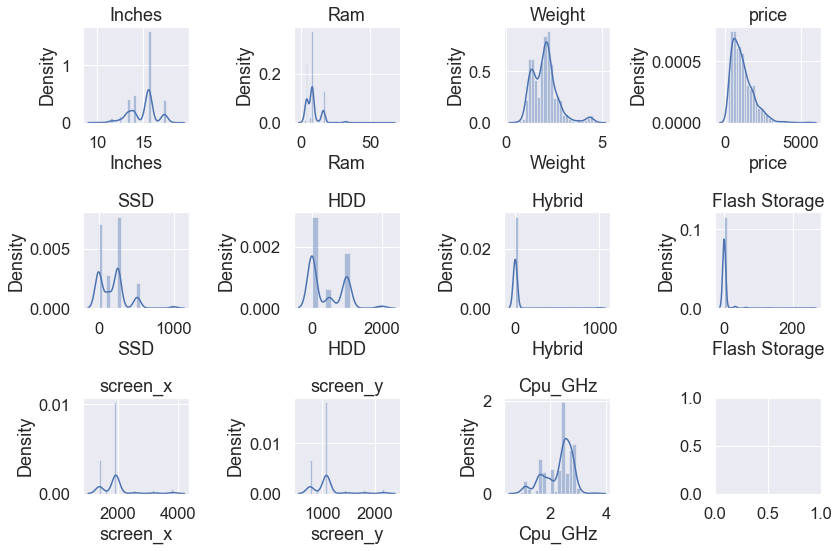

In [199]:
# kde plot
kde_or_box_per_column(column_list=continuous_variables, df=df_train, plot_type='kde')

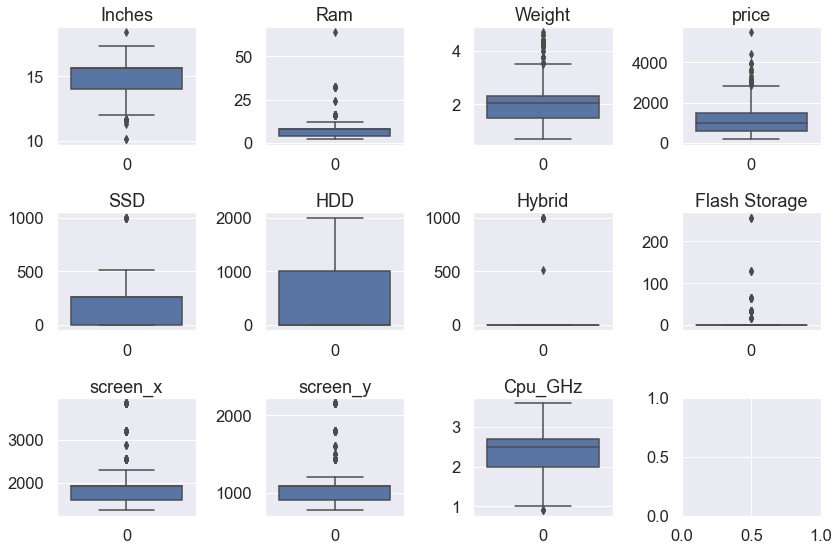

In [200]:
# boxplot
kde_or_box_per_column(column_list=continuous_variables, df=df_train, plot_type='box')

# 3. Modeling

## 3.1 XGB and LGBM

In [47]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [48]:
X = train.drop('price', axis=1)
y = train['price']
X_test = test
# split dataframe into X & Y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
def print_best_params(model, params):
    cv=5
    grid_model = GridSearchCV(
        model, 
        param_grid = params,
        cv=cv,
        scoring='neg_mean_squared_error',
        verbose=0)

    grid_model.fit(X, y,verbose=0)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} {cv} CV 시 최적 평균 RMSE 값 {np.round(rmse, 4)}, 최적 Parameters:{grid_model.best_params_}')
    return grid_model.best_estimator_


In [51]:
xgb_params ={
    'learning_rate': [1e-3,3e-3,1e-2,0.05],
    'max_depth': [3,4,5],
    'subsample': [0.5,0.7,0.9],
    'colsample_bytree': [0.5,0.7,0.9],
    'silent': [True],
#     'gpu_id':[1] ,         
#     'tree_method':['hist','gpu_hist'],
#     'predictor':['gpu_predictor'],
    'n_estimators':[1000],
    'refit' : [True]
}
xgb_params = {'colsample_bytree': [0.7], 'learning_rate': [0.05], 'max_depth': [3], 'n_estimators': [1000], 'subsample': [0.9]}
xgb_model = XGBRegressor()
xgb_estimator = print_best_params(xgb_model, xgb_params)

[02:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { refit, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { refit, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { refit, silent } might not be used.

  This may not be accurate due to some parameters are only used in

In [ ]:
# XGB 5CV결과 RMSE : 262.5933
# 최적 Parameters:{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'refit': True, 'silent': True, 'subsample': 0.9}

In [52]:
lgb_params = {
    'bagging_fraction':[0.5,0.7,0.9],
    'feature_fraction':[0.5,0.7,0.9],
    'objective':['regression'],
#     'num_leaves' : [31], # default = 31
    'learning_rate' : [1e-2,0.05],
    'n_estimators':[1000,5000],
    'max_bin' : [255],
#     'gpu_id':[0] ,         
    'boosting':['gbdt','dart'],
#     'refit':[True],
#     'verboseity':[0]
}
lgb_params = {'bagging_fraction': [0.5], 'boosting': ['dart'], 'feature_fraction': [0.5], 'learning_rate': [0.05], 'max_bin': [255], 'n_estimators': [5000], 'num_leaves': [31], 'objective': ['regression']}
lgb_model = LGBMRegressor()
lgb_estimator = print_best_params(lgb_model, lgb_params)


[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] 

In [62]:
dir(lgb_estimator)
lgb_estimator.feature_importances_
len(lgb_estimator.feature_importances_)

64

In [93]:
np.array(lgb_estimator.feature_importances_)

array([ 9910,  5310, 33365,  7246,  4575,     0,   217,  4644,  2422,
        5222,  1968,   178,  1714,   205,     0,  2250,  1531,  1129,
         974,  1003,  2046,  2212,  1332, 16356,  1224,  4264,  2024,
        3601,  1472,  2131,  1327,  1021,   449,   233,  1049,     0,
        2134,  3045,     0,  3702,     0,  3307,   759,     0,     0,
           0,     0,   265,     0,   431,   231,     0,   263,   506,
        2116,     0,   995,     0,   759,  1290,    51,  3158,  1733,
         497])

In [ ]:
# LGBM 5CV결과 RMSE : 287.2203
# 최적 Parameters:{'bagging_fraction': 0.5, 'boosting': 'dart', 'feature_fraction': 0.5, 'gpu_id': 0, 'learning_rate': 0.05, 'max_bin': 255, 'n_estimators': 5000, 'num_leave': -1, 'objective': 'regression'}

### What's the meaning of "No further splits with positive gain, best gain: -inf" message?

- That is, LGB is trying to split the data in leaf but it can't. The greater min_data_in_leaf is the more conservative the algorithm is. Its optimal value depends on the number of training samples and num_leaves.


- It means the learning of tree in current iteration should be stop, due to cannot split any more. I think this is caused by "min_data_in_leaf":1000, you can set it to a smaller value.

- You're right, it is not a loop. It just appeared as if it was, because the number of trees was high. So in case such a message appears, it might be usefull to check n_estimators or the parameters for the number of maximum leafes in a tree or the data parameters like min data in leaf, or min gain etc

출처 : https://datascience.stackexchange.com/questions/66902/what-does-the-repeated-message-no-further-splits-with-positive-gain-best-gain/89151#89151

### 2.2 Catboost

In [53]:
def cat_cv_best_params(model, params):
    cv=5
    grid_model = GridSearchCV(
        model, 
        param_grid = params,
        cv=cv,
        scoring='neg_mean_squared_error',
        verbose=0)

    grid_model.fit(X.values, y.values,verbose=0)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} {cv} CV 시 최적 평균 RMSE 값 {np.round(rmse, 4)}, 최적 Parameters:{grid_model.best_params_}')
    return grid_model.best_estimator_


from catboost import CatBoostRegressor
cat_params = {
            "iterations": [1000], # default=1000
            "depth": [6], # default=6
            "loss_function": ["RMSE"],
            "verbose": [False],
            "learning_rate":[1e-2,3e-2,0.1],
            "rsm":[0.5,0.7,0.9], # Alias: "colsample_bylevel"
            "subsample":[0.5,0.7,0.9]
}

cat_params = {'depth': [6], 'iterations': [1000], 'learning_rate': [0.03], 'loss_function': ['RMSE'], 'rsm': [0.7], 'subsample': [0.7], 'verbose': [False]}

cat_model = CatBoostRegressor()
cat_estimator = cat_cv_best_params(cat_model, cat_params)


CatBoostRegressor 5 CV 시 최적 평균 RMSE 값 269.2121, 최적 Parameters:{'depth': 6, 'iterations': 1000, 'learning_rate': 0.03, 'loss_function': 'RMSE', 'rsm': 0.7, 'subsample': 0.7, 'verbose': False}


In [54]:
# RMSE 값 269.2121, 
# 최적 Parameters:{'depth': 6, 'iterations': 1000, 'learning_rate': 0.03, 'loss_function': 'RMSE', 'rsm': 0.7, 'subsample': 0.7, 'verbose': False}

## 2.3 Feature Importance Visualization

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # matplotlib 도 종류가 다양하기 때문에 seaborn 스타일로 지정한 거임.
sns.set(font_scale=1) # (기본으로) 폰트 크기 2.5로 지정 미리 해놓는거 2.5면 꽤 크게 나옴

%matplotlib inline 

def plot_feature_importance(model_result,feature_names,model_title,nfeatures):

    feature_importance = np.array(model_result.feature_importances_)
    feature_names = np.array(feature_names)
    
    df_feature_importance = pd.DataFrame(feature_importance, index = feature_names, columns=['importnace_values']).iloc[:nfeatures]

    df_feature_importance.sort_values(by=['importnace_values'], ascending=False,inplace=True)
    
    plt.figure(figsize=(5,4))
    #Plot Searborn bar chart
    sns.barplot(x=df_feature_importance['importnace_values'], y=df_feature_importance.index)
    #Add chart labels
    plt.title(f'{model_title} Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

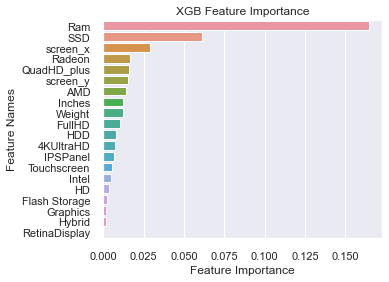

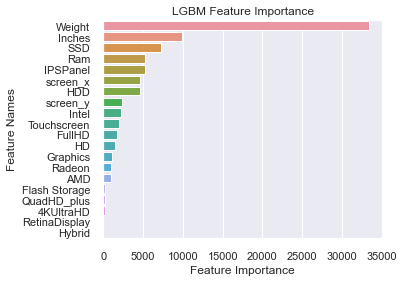

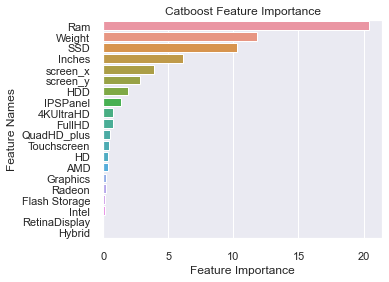

In [119]:
model_types = ['XGB','LGBM','Catboost']    
model_names = [xgb_estimator,lgb_estimator,cat_estimator]

for model_title,model_result in zip(model_types, model_names):
    plot_feature_importance(model_result=model_result, feature_names=X.columns, model_title=model_title, nfeatures=20)

In [55]:
y.describe()

count    1002.000000
mean     1131.957585
std       696.644911
min       174.000000
25%       597.250000
50%       979.000000
75%      1499.000000
max      5499.000000
Name: price, dtype: float64

In [56]:
test = test.loc[:,X.columns]
all(X.columns==test.columns)

True

In [57]:
xgb_preds = xgb_estimator.predict(test)
lgb_preds = lgb_estimator.predict(test)
cat_preds = cat_estimator.predict(test.values)

# 다음과 같이 평균을 내어 앙상블을 할 수 있다.
preds = 0.4* xgb_preds + 0.2*lgb_preds + 0.4*cat_preds
pd.DataFrame(preds,columns=['price'])
# 참고 : https://www.kaggle.com/janged/xgb-lgb

,price
0,1235.103537
1,1192.496179
2,437.452871
3,947.582444
4,1236.468603
...,...
256,1309.373746
257,1026.608137
258,3778.830302
259,2125.556017


In [58]:
pd.DataFrame(preds,columns=['price']).to_csv('1st_prediction_ensemble_xgb_lgbm_cat.csv',header=True,index=False)

In [59]:
pd.read_csv('1st_prediction_ensemble_xgb_lgbm_cat.csv')

,price
0,1235.103537
1,1192.496179
2,437.452871
3,947.582444
4,1236.468603
...,...
256,1309.373746
257,1026.608137
258,3778.830302
259,2125.556017
